First few rows of Client Profiles dataset:
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  

First few rows of Digital Footprints dataset:
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  5805605

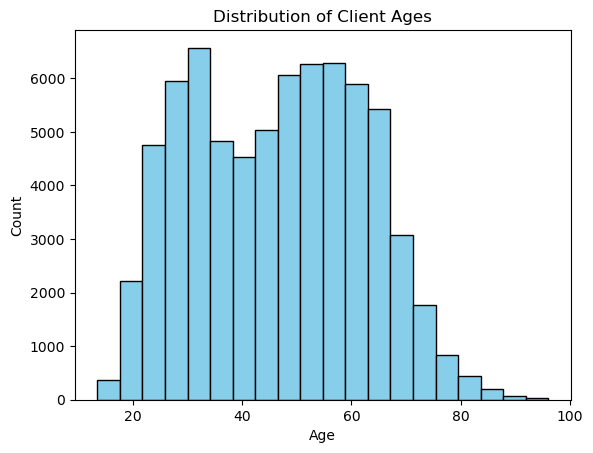

Unique values of 'gender' column in Client Profiles dataset:
['U' 'M' 'F' 'Unknown' 'X']
<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ MB


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

df_final_demo = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/df_final.csv")
df_final_experiment_clients = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/exp.csv")
df_final_web_data_1 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/data_1.csv")
df_final_web_data_2 = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/projects/datasets/2/data_2.csv")

df_final_web_data = pd.concat([df_final_web_data_1,df_final_web_data_2])

df_final_demo

df_final_experiment_clients

df_final_web_data

# Display the first few rows of each dataset
print("First few rows of Client Profiles dataset:")
print(df_final_demo.head())

print("\nFirst few rows of Digital Footprints dataset:")
print(df_final_web_data.head())

print("\nFirst few rows of Experiment Roster dataset:")
print(df_final_experiment_clients.head())

# Display concise summary of each dataset
print("Info of Client Profiles dataset:")
print(df_final_demo.info())

print("\nInfo of Digital Footprints dataset:")
print(df_final_web_data.info())

print("\nInfo of Experiment Roster dataset:")
print(df_final_experiment_clients.info())

# Descriptive statistics of each dataset
print("Descriptive statistics of Client Profiles dataset:")
print(df_final_demo.describe())

print("\nDescriptive statistics of Digital Footprints dataset:")
print(df_final_web_data.describe())

print("\nDescriptive statistics of Experiment Roster dataset:")
print(df_final_experiment_clients.describe())

# Display unique values in a specific column
print("Unique values of 'gender' column in Client Profiles dataset:")
print(df_final_demo['gendr'].unique())

# Check for any missing values in a specific column
print("Missing values in 'clnt_age' column in Client Profiles dataset:")
print(df_final_demo['clnt_age'].isnull().sum())

# Handling missing values in the 'clnt_age' column by replacing them with the median age
median_age = df_final_demo['clnt_age'].median()
df_final_demo['clnt_age'].fillna(median_age, inplace=True)

# Handling the 'gender' column by replacing unknown values with a more appropriate label, for example 'Unknown'
df_final_demo['gendr'].fillna('Unknown', inplace=True)

# Check for missing values in the 'clnt_age' column
print("Missing values in 'clnt_age' column after handling:")
print(df_final_demo['clnt_age'].isnull().sum())

# Calculate the median age to ensure it has been correctly used for imputation
median_age_post_imputation = df_final_demo['clnt_age'].median()
print("Median age after handling missing values:", median_age_post_imputation)

# Create a histogram of client ages
plt.hist(df_final_demo['clnt_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Display unique values in the 'gender' column after handling missing values
print("Unique values of 'gender' column in Client Profiles dataset:")
print(df_final_demo['gendr'].unique())

# Convert 'date_time' column to datetime data type
df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'])

df_final_web_data.info()

In [2]:
# Merge Client Profiles with Experiment Roster
merged_data = df_final_demo.merge(df_final_experiment_clients, on='client_id', how='left')

# Merge Digital Footprints with the merged Client Profiles and Experiment Roster
merged_data = merged_data.merge(df_final_web_data, on='client_id', how='left')

In [3]:
merged_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32


In [4]:
# Create a DataFrame for the control group
control_group_df = merged_data[merged_data['Variation'] == 'Control']

# Create a DataFrame for the test group
test_group_df = merged_data[merged_data['Variation'] == 'Test']

In [5]:
# Sort the control group DataFrame
control_group_df = control_group_df.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

# Sort the test group DataFrame
test_group_df = test_group_df.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

In [6]:
control_group_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
302517,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28
302516,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17
302515,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20
302512,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55
302511,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143007,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:28:00
143004,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25
143001,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28
143003,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28


In [7]:
test_group_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
255457,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34
255461,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56
255460,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03
255459,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35
255458,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310196,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19
310190,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49
310189,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04
51321,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03


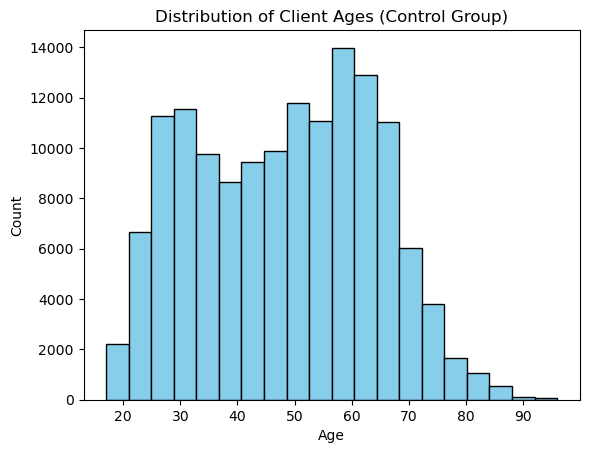

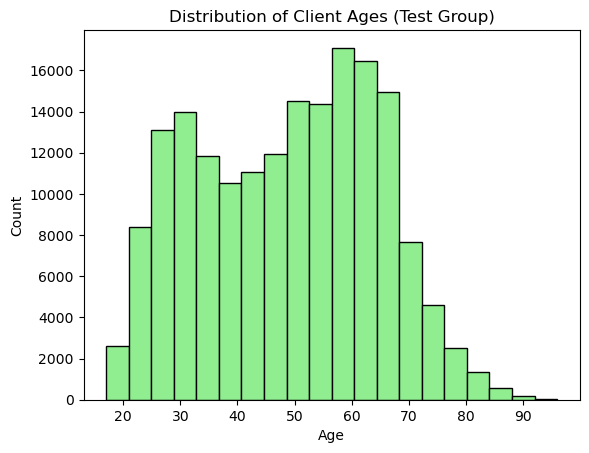

In [8]:

# Calculate and visualize the distribution of client ages for the control group
plt.hist(control_group_df['clnt_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Ages (Control Group)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Calculate and visualize the distribution of client ages for the test group
plt.hist(test_group_df['clnt_age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Client Ages (Test Group)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
# Identify the final step of the process
final_step = 'confirm'

# Calculate completion rate for each group
completion_rate = merged_data.groupby(['Variation', 'client_id']).apply(
    lambda df: final_step in df['process_step'].values
).reset_index(name='completed')

# Aggregate completion rate
completion_rate_summary = completion_rate.groupby('Variation')['completed'].mean().reset_index()
completion_rate_summary.columns = ['Variation', 'Completion_Rate']
print(completion_rate_summary)



  Variation  Completion_Rate
0   Control         0.655873
1      Test         0.692932


In [12]:
# Ensure 'date_time' is in datetime format
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])

# Sort data by client_id and date_time
merged_data.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate time difference between steps for each client
merged_data['time_diff'] = merged_data.groupby(['client_id'])['date_time'].diff()

# Calculate average time spent on each step for each variation
time_spent_summary = merged_data.groupby(['Variation', 'process_step'])['time_diff'].mean().reset_index()
time_spent_summary.columns = ['Variation', 'Process_Step', 'Avg_Time_Spent']
print(time_spent_summary)


  Variation Process_Step            Avg_Time_Spent
0   Control      confirm 0 days 18:21:17.307379630
1   Control        start 4 days 05:57:44.544592030
2   Control       step_1 0 days 00:30:38.781647281
3   Control       step_2 0 days 00:00:39.342259834
4   Control       step_3 0 days 00:09:35.220494575
5      Test      confirm 1 days 05:00:32.783103231
6      Test        start 3 days 02:55:49.873986735
7      Test       step_1 0 days 00:22:19.804570955
8      Test       step_2 0 days 00:01:51.212471355
9      Test       step_3 0 days 00:12:18.920516488


/var/folders/4_/bndn2xws459c_96f3x1tv1_40000gn/T/ipykernel_5280/971549024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_all_steps['Total_Time_All_Steps'] = total_time_all_steps.groupby('Variation')['Avg_Time_Spent'].transform('sum')


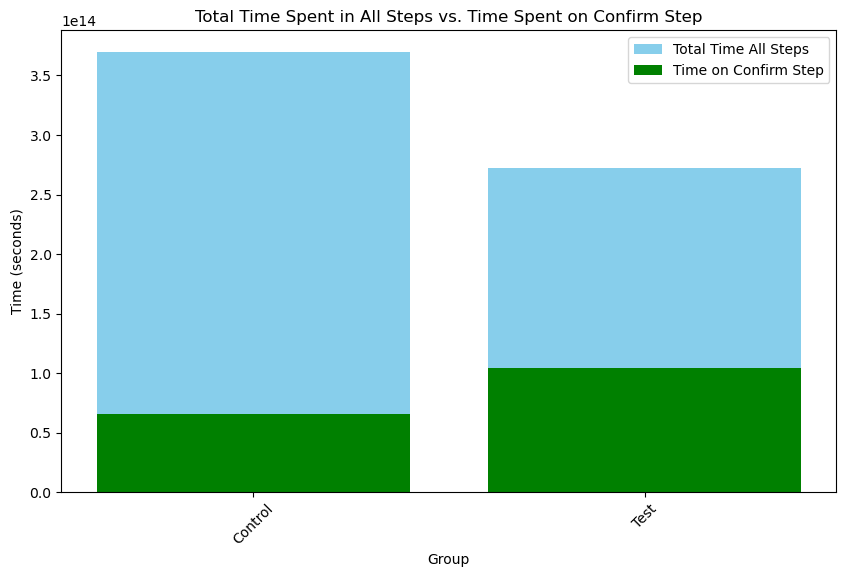

In [17]:

# Filter time_spent_summary for all steps except "confirm"
total_time_all_steps = time_spent_summary[time_spent_summary['Process_Step'] != 'confirm']

# Calculate total time spent in all steps for each group
total_time_all_steps['Total_Time_All_Steps'] = total_time_all_steps.groupby('Variation')['Avg_Time_Spent'].transform('sum')
total_time_all_steps = total_time_all_steps.drop_duplicates(subset='Variation')

# Filter time_spent_summary for the "confirm" step
confirm_step_data = time_spent_summary[time_spent_summary['Process_Step'] == 'confirm']

# Plotting
plt.figure(figsize=(10, 6))

# Plot total time spent in all steps
plt.bar(total_time_all_steps['Variation'], total_time_all_steps['Total_Time_All_Steps'], color='skyblue', label='Total Time All Steps')

# Plot time spent on the "confirm" step
plt.bar(confirm_step_data['Variation'], confirm_step_data['Avg_Time_Spent'], color='green', label='Time on Confirm Step')

plt.title('Total Time Spent in All Steps vs. Time Spent on Confirm Step')
plt.xlabel('Group')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [18]:
# Define conditions that are considered errors (example: repeated steps)
def is_error(df):
    return df['process_step'].duplicated().any()

# Calculate error rates for each client
error_rate = merged_data.groupby(['Variation', 'client_id']).apply(is_error).reset_index(name='error_occurred')

# Aggregate error rate
error_rate_summary = error_rate.groupby('Variation')['error_occurred'].mean().reset_index()
error_rate_summary.columns = ['Variation', 'Error_Rate']
print(error_rate_summary)


  Variation  Error_Rate
0   Control    0.536376
1      Test    0.589069
